In [1]:
#Importing The Dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [2]:
#Data Collection and Processing
#loading the csv data to the Pandas Dataframe
dataset=pd.read_csv("HEART.csv")

In [3]:
#print first five rows of the dataset
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#print last 5 rows of the dataset
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
1883,60,1,0,140,207,0,0,138,1,1.9,2,1,3,0
1884,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
1885,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
1886,54,1,1,154,232,0,0,164,0,0.0,2,1,2,0
1887,53,1,0,110,335,0,1,143,1,3.0,1,1,3,0


In [5]:
#number of rows and columns in the dataset
dataset.shape

(1888, 14)

In [6]:
#getting some info about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int64  
 5   fbs       1888 non-null   int64  
 6   restecg   1888 non-null   int64  
 7   thalachh  1888 non-null   int64  
 8   exang     1888 non-null   int64  
 9   oldpeak   1888 non-null   float64
 10  slope     1888 non-null   int64  
 11  ca        1888 non-null   int64  
 12  thal      1888 non-null   int64  
 13  target    1888 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 206.6 KB


In [7]:
#checking for missing values
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#statistical measures about the data
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,54.354343,0.688559,1.279131,131.549258,246.855403,0.148305,0.597458,149.424258,0.331568,1.053761,1.421610,0.731462,2.662606,0.517479
std,9.081505,0.463205,1.280877,17.556985,51.609329,0.355496,0.638820,23.006153,0.470901,1.161344,0.619588,1.015735,1.249924,0.499827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,1.000000


In [9]:
#checking the distribution of target Variable
dataset['target'].value_counts()

target
1    977
0    911
Name: count, dtype: int64

In [10]:
# ---> Defective heart = 1
# ---> Healthy Heart = 0

In [11]:
#Splitting the features and num
X=dataset.drop(columns='target',axis=1)
Y=dataset['target']

In [12]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalachh  exang  oldpeak  \
0      63    1   3       145   233    1        0       150      0      2.3   
1      37    1   2       130   250    0        1       187      0      3.5   
2      41    0   1       130   204    0        0       172      0      1.4   
3      56    1   1       120   236    0        1       178      0      0.8   
4      57    0   0       120   354    0        1       163      1      0.6   
...   ...  ...  ..       ...   ...  ...      ...       ...    ...      ...   
1883   60    1   0       140   207    0        0       138      1      1.9   
1884   46    1   0       140   311    0        1       120      1      1.8   
1885   59    1   3       134   204    0        1       162      0      0.8   
1886   54    1   1       154   232    0        0       164      0      0.0   
1887   53    1   0       110   335    0        1       143      1      3.0   

      slope  ca  thal  
0         0   0     1  
1         0   0

In [13]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
1883    0
1884    0
1885    0
1886    0
1887    0
Name: target, Length: 1888, dtype: int64


In [14]:
#Splitting the data into Training data & test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [15]:
print(X.shape,X_train.shape,X_test.shape)

(1888, 13) (1510, 13) (378, 13)


In [16]:
# model training 

In [17]:
#Logistics Regression
model=LogisticRegression()

In [18]:

#training the logisticRegression model with Training data
model.fit(X_train, Y_train)

c:\Users\mohit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
#Model Evaluation
#Accuracy Score
#accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [20]:
print('Accuracy on training data : ',training_data_accuracy)

Accuracy on training data :  0.7715231788079471


In [21]:
#accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction, Y_test)

In [22]:
print('Accuracy on Test data : ',test_data_accuracy)

Accuracy on Test data :  0.7354497354497355


In [23]:
#Building a Predictive System
input_data=(41,0,1,130,204,0,0,172,0,1.4,2,0,2)

#change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')
    

[1]
The Person has Heart Disease


c:\Users\mohit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
# Accuracy With Decision Treee
from sklearn.tree import DecisionTreeClassifier #for using decision tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [25]:
dataset.shape #get the shape of the dataset

(1888, 14)

In [26]:
df = pd.DataFrame(dataset)#apply any operation(drop) on column we use dataframe
print(df)

      age  sex  cp  trestbps  chol  fbs  restecg  thalachh  exang  oldpeak  \
0      63    1   3       145   233    1        0       150      0      2.3   
1      37    1   2       130   250    0        1       187      0      3.5   
2      41    0   1       130   204    0        0       172      0      1.4   
3      56    1   1       120   236    0        1       178      0      0.8   
4      57    0   0       120   354    0        1       163      1      0.6   
...   ...  ...  ..       ...   ...  ...      ...       ...    ...      ...   
1883   60    1   0       140   207    0        0       138      1      1.9   
1884   46    1   0       140   311    0        1       120      1      1.8   
1885   59    1   3       134   204    0        1       162      0      0.8   
1886   54    1   1       154   232    0        0       164      0      0.0   
1887   53    1   0       110   335    0        1       143      1      3.0   

      slope  ca  thal  target  
0         0   0     1       1  

In [27]:
df.corr

<bound method DataFrame.corr of       age  sex  cp  trestbps  chol  fbs  restecg  thalachh  exang  oldpeak  \
0      63    1   3       145   233    1        0       150      0      2.3   
1      37    1   2       130   250    0        1       187      0      3.5   
2      41    0   1       130   204    0        0       172      0      1.4   
3      56    1   1       120   236    0        1       178      0      0.8   
4      57    0   0       120   354    0        1       163      1      0.6   
...   ...  ...  ..       ...   ...  ...      ...       ...    ...      ...   
1883   60    1   0       140   207    0        0       138      1      1.9   
1884   46    1   0       140   311    0        1       120      1      1.8   
1885   59    1   3       134   204    0        1       162      0      0.8   
1886   54    1   1       154   232    0        0       164      0      0.0   
1887   53    1   0       110   335    0        1       143      1      3.0   

      slope  ca  thal  target  

In [28]:
train, test=train_test_split(df, test_size=0.3)#in this our main dataset split into train and test
#the attribute test_size=0.3 splits the data into (train)70% and (test)30%
print(train.shape)
print(test.shape)

(1321, 14)
(567, 14)


In [29]:
train, test=train_test_split(df, test_size=0.3)#in this our main dataset split into train and test
#the attribute test_size=0.3 splits the data into (train)70% and (test)30%
print(train.shape)
print(test.shape)

(1321, 14)
(567, 14)


In [30]:
train_X=train[['age','sex','cp','trestbps','chol','fbs','restecg','thalachh','exang','oldpeak','slope','ca','thal']]
train_y=train.target#output of our training data
test_X=test[['age','sex','cp','trestbps','chol','fbs','restecg','thalachh','exang','oldpeak','slope','ca','thal']]
test_y=test.target#output value of test data

In [31]:
#using DTC
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)

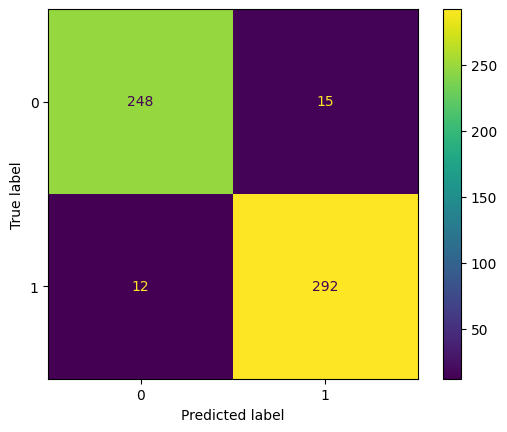

In [32]:
ConfusionMatrixDisplay.from_predictions(test_y,prediction)#confusion matrix

In [33]:
print(classification_report(test_y,prediction))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       263
           1       0.95      0.96      0.96       304

    accuracy                           0.95       567
   macro avg       0.95      0.95      0.95       567
weighted avg       0.95      0.95      0.95       567



In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 2: Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# Step 3: Predict and evaluate
Y_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_pred)

Y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_train_pred)

# Step 4: Print accuracies
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 1.0
Test Accuracy: 0.9656084656084656


In [36]:
import joblib

# Save the trained model
joblib.dump(model, "clinical_model.pkl")


['clinical_model.pkl']